<a href="https://colab.research.google.com/github/chadha-code1/My-Data-Science-Portfolio/blob/main/churn_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
df = pd.read_csv("/Churn_Modelling.csv")


In [ ]:
df.shape

(10000, 14)

In [ ]:
#pour visualiser les 4 &er lignes

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#visualisation des types de champs

df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#donner les informations des donnees
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#check null values there is no null values
null_val =df.isnull().sum()
null_val

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
pourcentage = null_val*100/9999
pourcentage

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [ ]:
##check sum of null values  there is no duplicated values
df.duplicated().sum()

0

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#moyenne
df.mean()

CreditScore           650.528800
Geography               0.746300
Gender                  0.545700
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64

# Supprimer les colonnes : RowNumber,CustomerId,Surname

In [ ]:
del df['RowNumber']


In [ ]:
del df['CustomerId']
del df['Surname']

# Nettoyer les données

In [ ]:
#transform the column geography
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

# Les corrélations entre les attributs

In [ ]:
from matplotlib import pyplot
df.corr().style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,0.0079,-0.0029,-0.004,0.00084,0.0063,0.012,-0.0055,0.026,-0.0014,-0.027
Geography,0.0079,1.0,0.0047,0.023,0.0037,0.069,0.004,-0.0085,0.0067,-0.0014,0.036
Gender,-0.0029,0.0047,1.0,-0.028,0.015,0.012,-0.022,0.0058,0.023,-0.0081,-0.11
Age,-0.004,0.023,-0.028,1.0,-0.01,0.028,-0.031,-0.012,0.085,-0.0072,0.29
Tenure,0.00084,0.0037,0.015,-0.01,1.0,-0.012,0.013,0.023,-0.028,0.0078,-0.014
Balance,0.0063,0.069,0.012,0.028,-0.012,1.0,-0.3,-0.015,-0.01,0.013,0.12
NumOfProducts,0.012,0.004,-0.022,-0.031,0.013,-0.3,1.0,0.0032,0.0096,0.014,-0.048
HasCrCard,-0.0055,-0.0085,0.0058,-0.012,0.023,-0.015,0.0032,1.0,-0.012,-0.0099,-0.0071
IsActiveMember,0.026,0.0067,0.023,0.085,-0.028,-0.01,0.0096,-0.012,1.0,-0.011,-0.16
EstimatedSalary,-0.0014,-0.0014,-0.0081,-0.0072,0.0078,0.013,0.014,-0.0099,-0.011,1.0,0.012


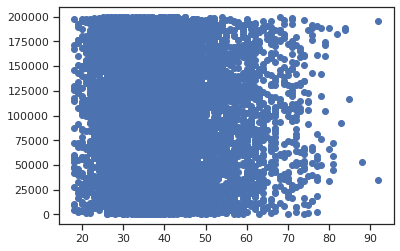

In [ ]:
import matplotlib.pyplot as plt
from numpy.random import randn

# On génère deux variables linéairement liées
a = df["Age"] # columns of attributes

b = df["EstimatedSalary"] # single column of labels
# On fait un plot de x en fonction de y
plt.scatter(a,b)

# Visualiser les données numériques dans un diagramme seaborn

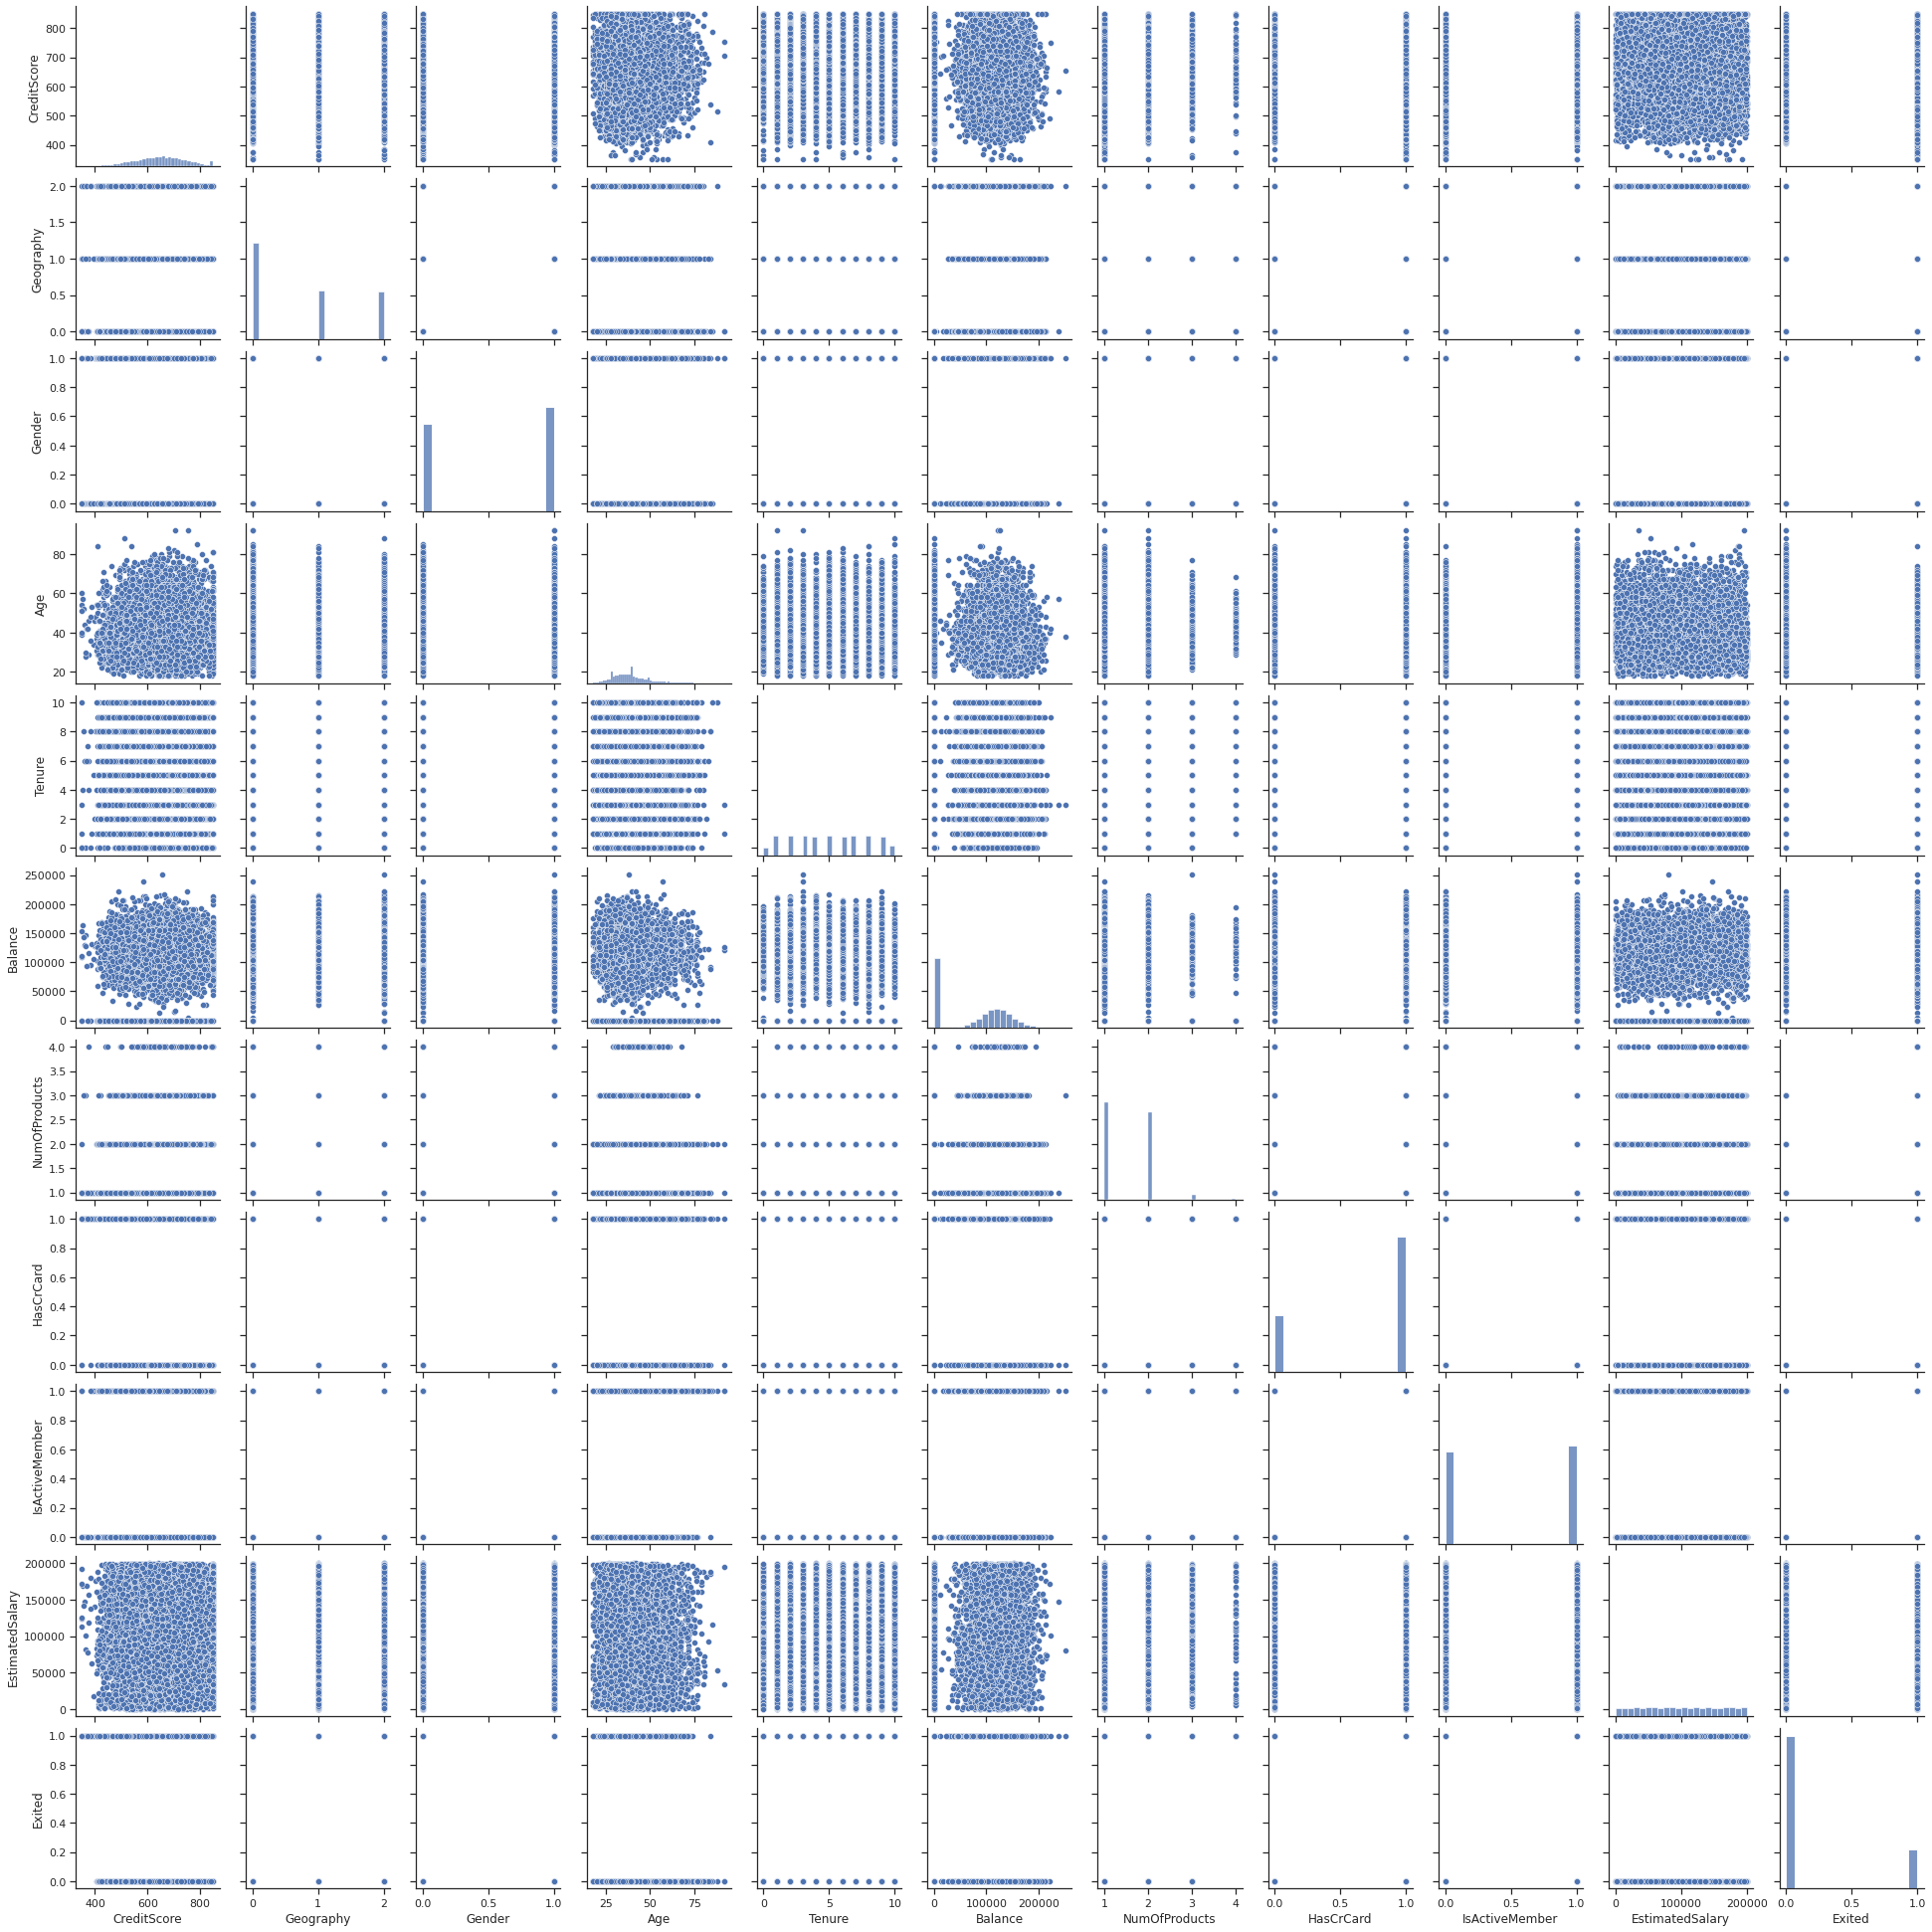

In [ ]:
import seaborn as sns
sns.set(style='ticks')
sns.pairplot(df);

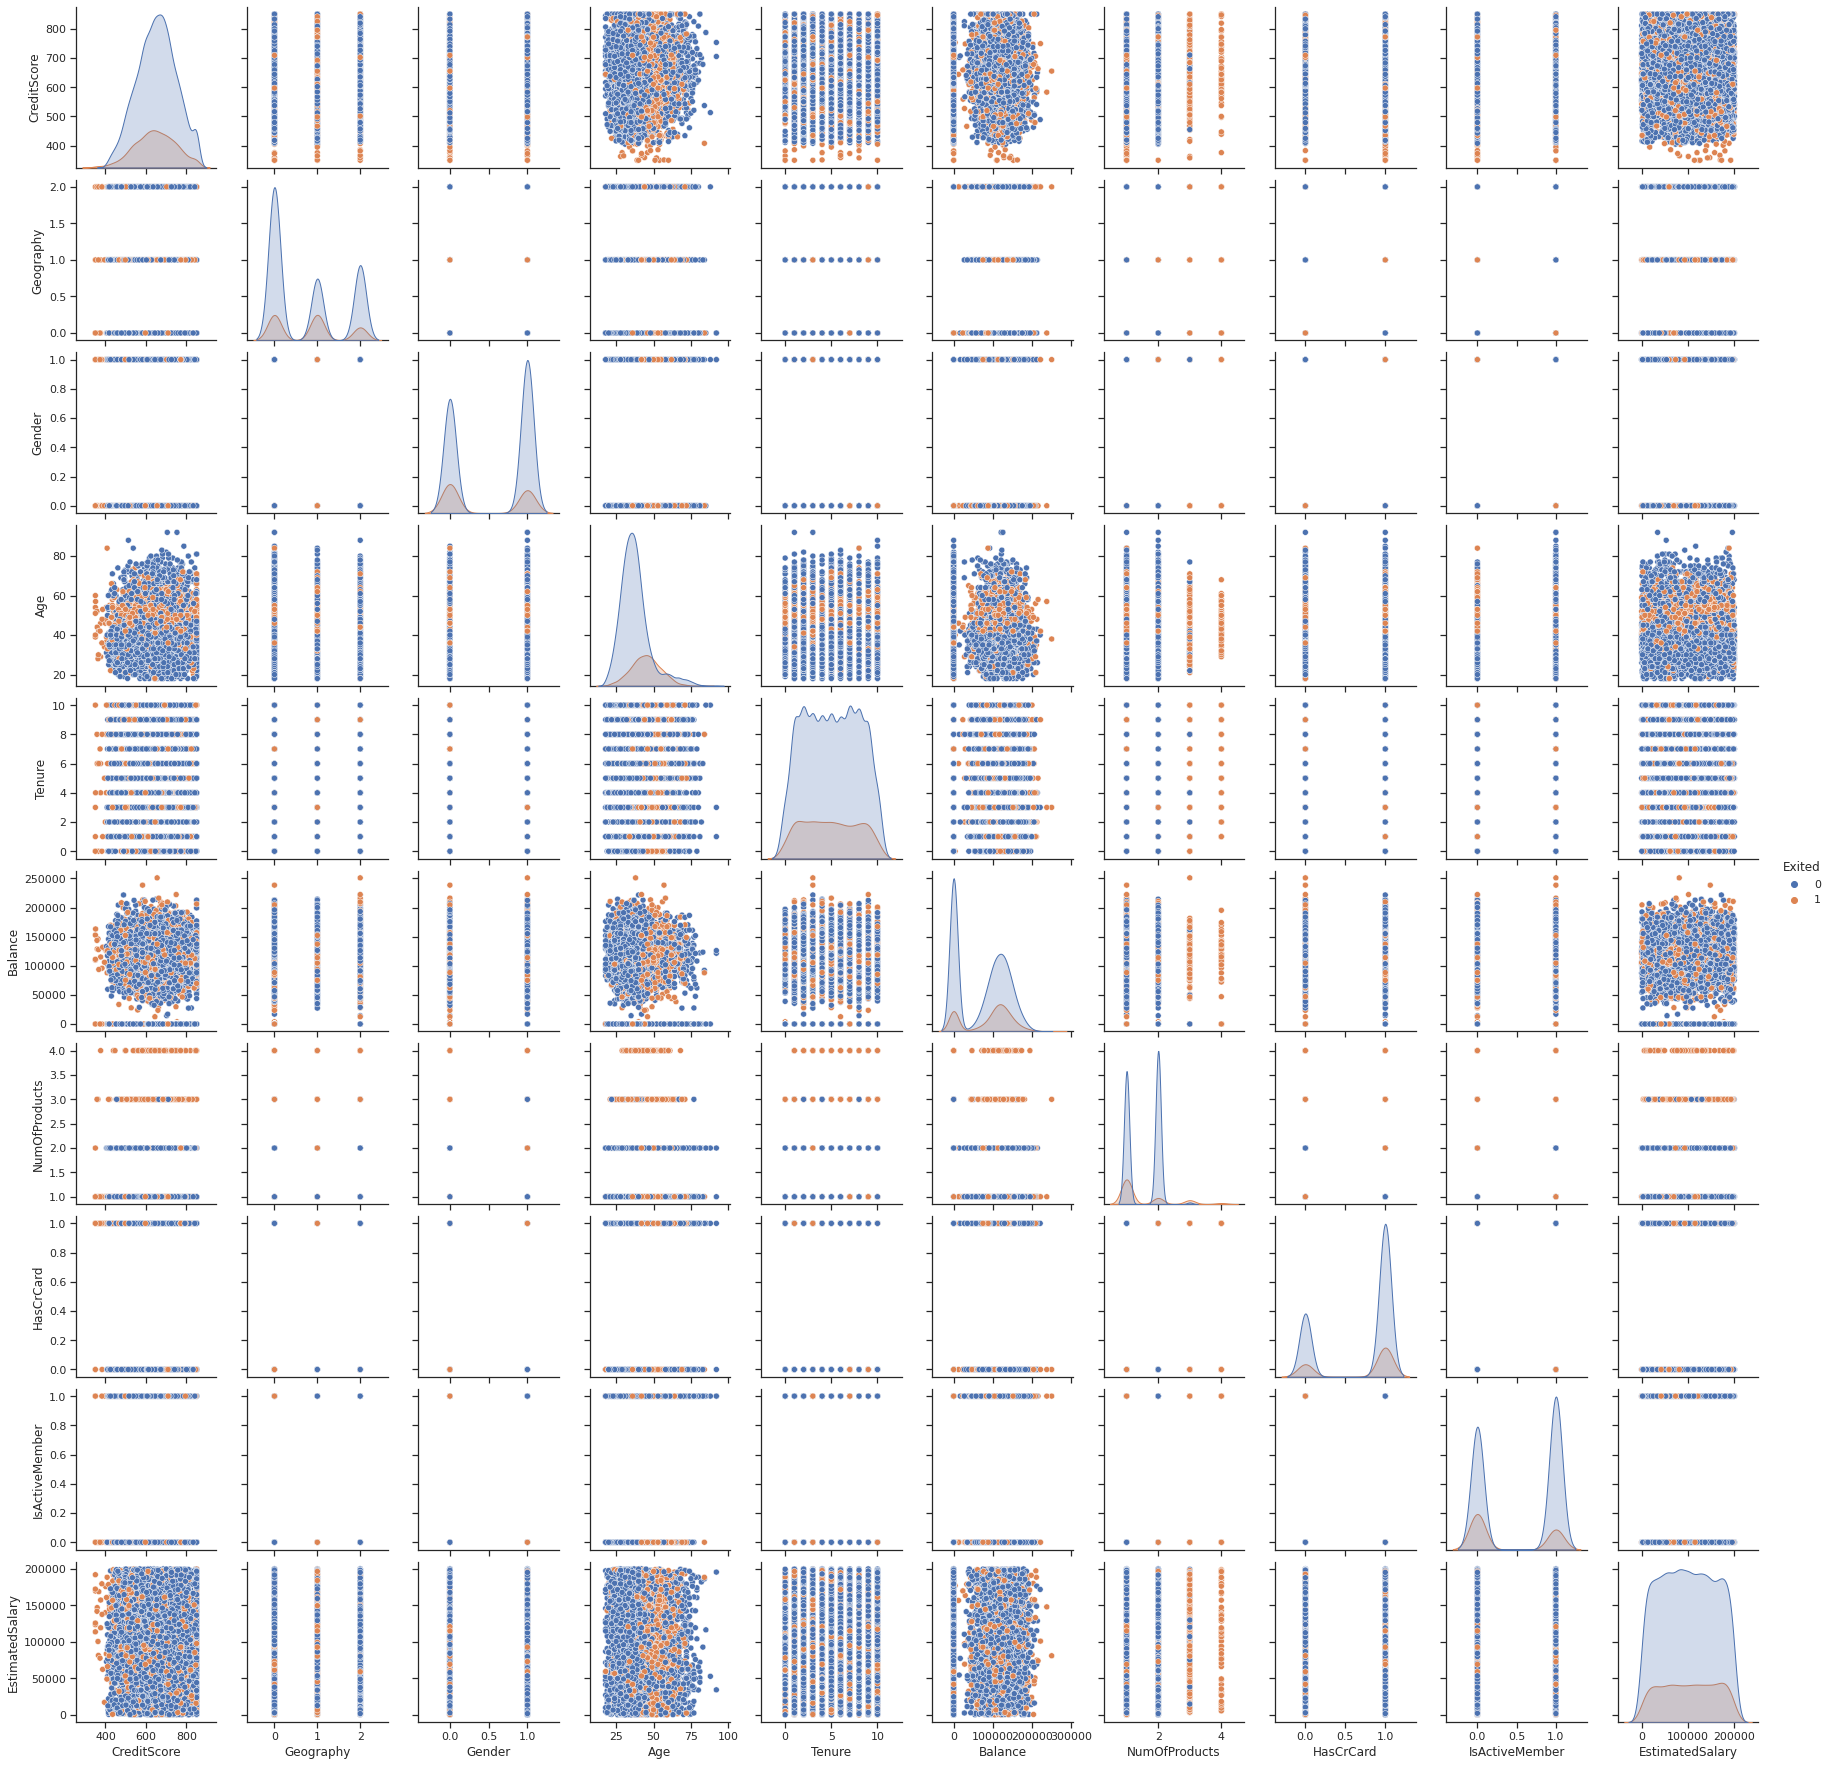

In [ ]:
import seaborn as sbn
sns.set(style='ticks')
sns.pairplot(df,hue = 'Exited')

In [ ]:
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


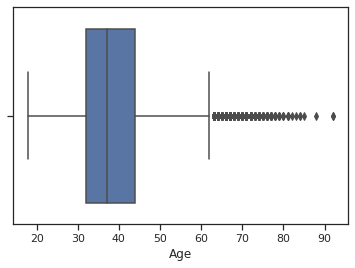

In [ ]:
sns.boxplot(df['Age'])


In [ ]:
#On supprime les valeurs aberrantes

#On calcule Q1

q1=df["CreditScore"].quantile(q=0.25)

#On calcule Q3

q3=df["CreditScore"].quantile(q=0.75)

#On calcule l'écart interquartile (IQR)

IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf = q1-1.5*IQR

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

borne_sup = q3 +1.5*IQR

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure

df= df[df["CreditScore"]<borne_sup]
df=df[df["CreditScore"]>borne_inf]

# Distribution uniforme





In [ ]:
Balance = df["Balance"]

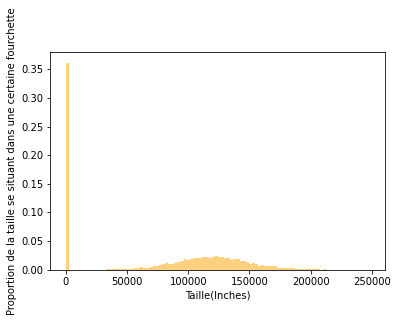

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()
num_bins = 100

# Histograme(PMF) des Tailles
counts, bins = np.histogram(Balance ,
							np.linspace(min(Balance),
										max(Balance),
										num_bins)
							)
ax.hist(Balance ,
		bins[:-1],
		facecolor='orange',
		alpha=0.5,
		color="b",
		weights=(1/sum(counts))*np.ones_like(Balance),
		label="Height's distribution")
plt.xlabel("Taille(Inches)")
plt.ylabel("Proportion de la taille se situant dans une certaine fourchette")
plt.show()

# Distribution gaussienne (normale)

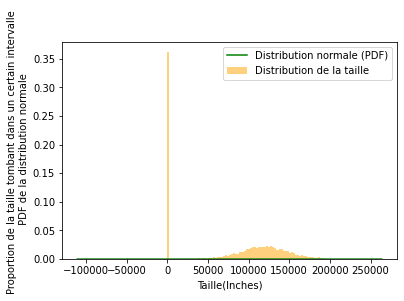

In [ ]:

from scipy.stats import norm

fig, ax = plt.subplots()
num_bins = 100

# Histogram(PMF) of Height
counts, bins = np.histogram(Balance ,
							np.linspace(min(Balance),
										max(Balance),
										num_bins)
							)
ax.hist(Balance ,
		bins[:-1],
		facecolor='orange',
		alpha=0.5,
		color="b",
		weights=(1/sum(counts))*np.ones_like(Balance),
		label="Distribution de la taille")
# PDF of Normal Distribution
mean, std = np.mean(Balance), np.std(Balance)
rvs = np.linspace(mean - 3*std, mean + 3*std, 100)
pdf = norm.pdf(rvs, mean, std)
#ax.plot(rvs, pdf, c="g", label="Distribution normale (PDF)") # N({'{:.2f}'.format(mean)}, {'{:.2f}'.format(std)})

plt.xlabel("Taille(Inches)")
plt.ylabel("Proportion de la taille tombant dans un certain intervalle \n PDF de la distribution normale")
leg = ax.legend()
plt.show()

# CDF  Distribution

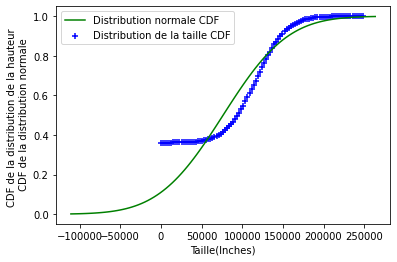

In [ ]:
fig, ax = plt.subplots()
num_bins = 100

# CDF of Heights
counts, bins = np.histogram(Balance ,
 							np.linspace(min(Balance),
										max(Balance),
										num_bins)
 							)
pmf = counts/sum(counts)
cdf = np.cumsum(pmf)
ax.scatter(bins[:-1], cdf, c='b', marker="+", label="Distribution de la taille CDF")
# CDF of Normal Distribution
mean, std = np.mean(Balance), np.std(Balance)
rvs = np.linspace(mean - 3*std, mean + 3*std, 100)
cdf = norm.cdf(rvs, mean, std)
ax.plot(rvs, cdf, c='g', label="Distribution normale CDF")
leg = ax.legend()

plt.xlabel("Taille(Inches)")
plt.ylabel("CDF de la distribution de la hauteur \n CDF de la distribution normale")
plt.show()

# Le classifieur KNN



Diviser le dataset en Train and Test

In [ ]:
#knn
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns!="Exited"] # columns of attributes

y = df["Exited"] # single column of labels
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

Normalisation des données ou standardisation: Features
scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Classifier les données en utilisant le classifieur KNN

In [ ]:
#normalisation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sc,y_train)
y_pred_knn = knn.predict(X_test_sc)

In [ ]:
print(y_pred_knn)

[0 0 0 ... 0 0 0]


In [ ]:
print(y_test)

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report
print('Confusion matrix KNN \n')
print(confusion_matrix(y_test,y_pred_knn))
print('Accuracy KNN : {}%'.format(round(100 * accuracy_score(y_test, y_pred_knn),2)))
print('Precision KNN : {}%'.format(round(100 * precision_score(y_test, y_pred_knn),2)))
print('Recall KNN : {}%'.format(round(100 * recall_score(y_test, y_pred_knn),2)))
print(classification_report(y_test,y_pred_knn))

Confusion matrix KNN 

[[1496   99]
 [ 232  173]]
Accuracy KNN : 83.45%
Precision KNN : 63.6%
Recall KNN : 42.72%
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1595
           1       0.64      0.43      0.51       405

    accuracy                           0.83      2000
   macro avg       0.75      0.68      0.71      2000
weighted avg       0.82      0.83      0.82      2000



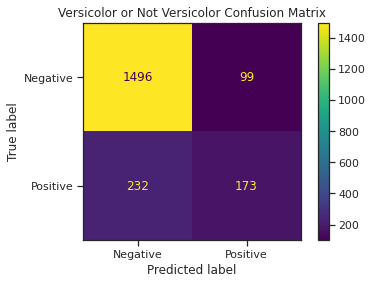

In [ ]:
from sklearn import metrics


cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Negative", "Positive"])

cm_display.plot()
plt.title('Versicolor or Not Versicolor Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

GridSearchCV pour le classifieur KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, scoring = 'accuracy', cv = 5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)
y_pred_knn_o = grille.predict(X_test_sc)


{'n_neighbors': 9}
0.8332500000000002


In [ ]:
print(y_test)

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64


In [ ]:
print(y_pred_knn_o)

[0 0 0 ... 0 0 0]


# GridSearchCV pour le classifieur KNN

In [ ]:
print('Confusion matrix KNN_O \n')
print(confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy KNN_O : {}%'.format(round(100 * accuracy_score(y_test,
y_pred_knn_o),2)))
print('Precision KNN_O : {}%'.format(round(100 * precision_score(y_test,
y_pred_knn_o),2)))
print('Recall KNN_O : {}%'.format(round(100 * recall_score(y_test,
y_pred_knn_o),2)))
print(classification_report(y_test,y_pred_knn_o))

Confusion matrix KNN_O 

[[1527   68]
 [ 250  155]]
Accuracy KNN_O : 84.1%
Precision KNN_O : 69.51%
Recall KNN_O : 38.27%
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.70      0.38      0.49       405

    accuracy                           0.84      2000
   macro avg       0.78      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000



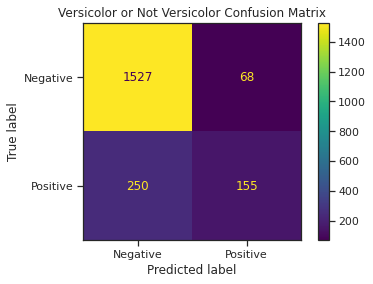

In [ ]:
from sklearn import metrics


cm_display = metrics.ConfusionMatrixDisplay(cm_o, display_labels = ["Negative", "Positive"])

cm_display.plot()
plt.title('Versicolor or Not Versicolor Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Matrice de confusion

In [ ]:
#matrice de confusion
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# import some data to play with

X = df.loc[:, df.columns!="Exited"] # columns of attributes

y = df["Exited"] # single column of labels
class_names = y

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


# Confusion Matrix from the Scikit-Learn library

In [ ]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns!="Exited"] # columns of attributes

y = df["Exited"] # single column of labels
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state= 0)
logit.fit(x_train, y_train)

y_predicted = logit.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[1542   53]
 [ 333   72]]


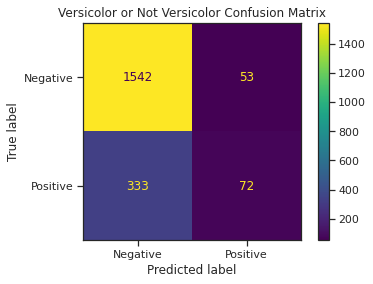

In [ ]:
from sklearn import metrics


cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels = ["Negative", "Positive"])

cm_display.plot()
plt.title('Versicolor or Not Versicolor Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1595
           1       0.58      0.18      0.27       405

    accuracy                           0.81      2000
   macro avg       0.70      0.57      0.58      2000
weighted avg       0.77      0.81      0.76      2000



In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# The distributions that might fit the  data

In [ ]:

h = df["Balance"].values


In [ ]:
!pip install Fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for Fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=21284b4c72db9d918580d07105dcefa6f9e55c8fd58b01fdf03c04b3090b07d2
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built Fitter


Fitting 5 distributions: 100%|██████████| 5/5 [00:10<00:00,  2.06s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,1.007617e-08,2891.632585,-275739.531578,inf,0.361779,0.0
beta,1.106561e-08,2620.511644,-274804.338707,inf,0.361779,0.0
lognorm,1.600948e-08,3163.883689,-271126.072823,inf,0.579257,0.0
norm,2.077176e-08,2592.389647,-268535.313642,inf,0.251600,0.0
gamma,2.078480e-08,2590.291278,-268519.839797,inf,0.252131,0.0


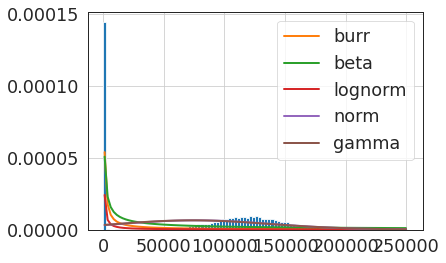

In [ ]:
#most suitable distribution

#Supply the data (h) and distributions list if you have a basic idea of the distributions that might fit your data
#Apply the .fit( ) method
#Generate the fitted distribution summary using .summary( ) method

from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(h,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

#By default, the summary function ranks the best five distributions based on the sumsquare_error values in ascending order.
#we have gama as the best distribution for our data

## *We* have gama as the best distribution for our data

the KNN algorithm has the highest level of precision and accuracy there for  we can use it for our dataSet for better predictions.